INF 2178-A3
Mingrui Fu 1010506551

In [ ]:
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


Step0: import data and library

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%pip install pingouin
from pingouin import ancova

In [ ]:
# Load the dataset
data = pd.read_csv("/drive/My Drive/2178/INF2178_A3_data.csv")
data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


Step1:EDA

       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000                     7.858000   
25%

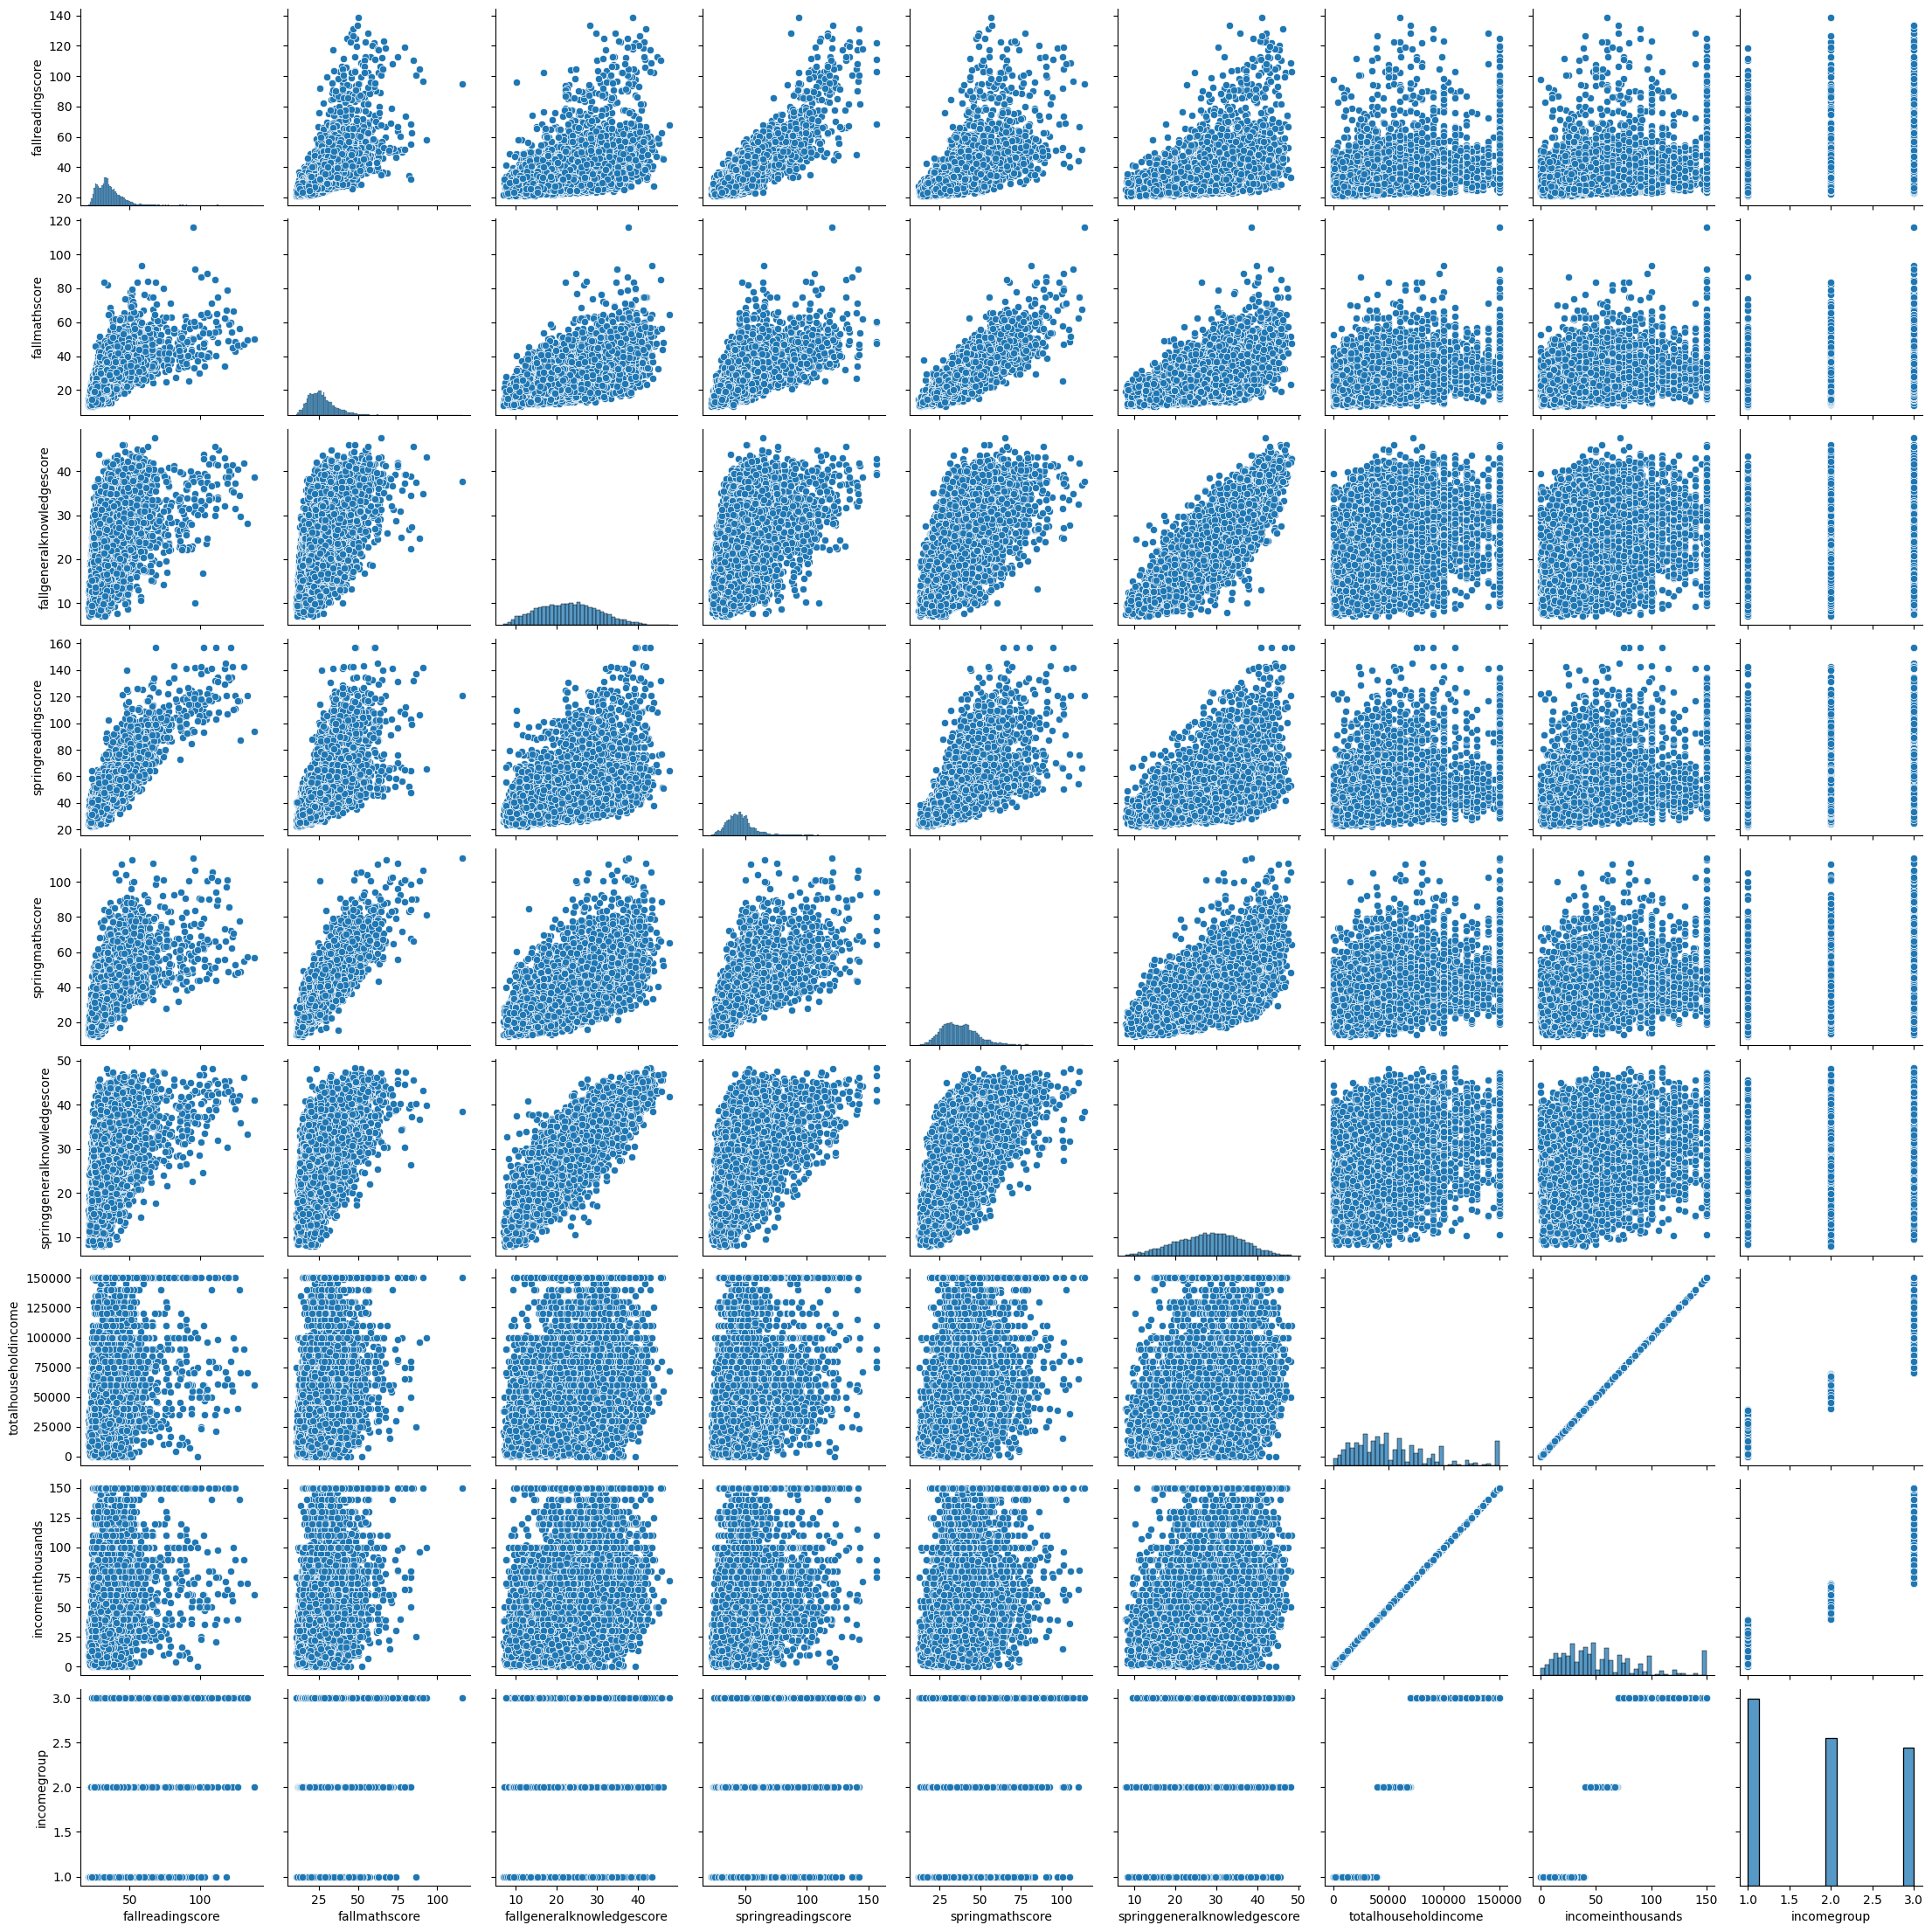

In [ ]:
# Exploratory Data Analysis
# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Pairplot for visualization
sns.pairplot(data)
plt.show()

Step2: research question1

How does household income relate to the academic performance (reading, math adn general knowledge) of kindergarten students over the course of a school year, when controlling for initial academic abilities (fall scores)?

In [ ]:
# ANCOVA for reading scores
model_reading = ols('springreadingscore ~ C(incomegroup) + fallreadingscore', data=data).fit()
print(model_reading.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:36:47   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

In [ ]:
# Interaction plot for reading scores by using R
library(tidyverse)
library(ggpubr)
library(rstatix)
library(broom)

In [ ]:
data <- read.csv("/drive/My Drive/2178/INF2178_A3_data.csv")
data$incomegroup <- factor(data$incomegroup)
data$reading_change <- data$springreadingscore - data$fallreadingscore
data$math_change <- data$springmathscore - data$fallmathscore
data$generalknowledge_change <- data$springgeneralknowledgescore - data$fallgeneralknowledgescore
# Display the first few rows of the dataset
head(data)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup,reading_change,math_change,generalknowledge_change
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,36.58,39.54,33.822,49.37,50.10,40.533,140000,140,3,12.79,10.56,6.711
2,50.82,44.44,38.147,83.50,58.93,37.409,120000,120,3,32.68,14.49,-0.738
3,40.68,28.57,28.108,40.41,32.81,29.312,90000,90,3,-0.27,4.24,1.204
4,32.57,23.57,15.404,34.14,35.25,27.382,50000,50,2,1.57,11.68,11.978
5,31.98,19.65,18.727,32.84,23.60,26.977,55000,55,2,0.86,3.95,8.250
6,50.45,36.27,33.352,64.13,53.31,32.703,150000,150,3,13.68,17.04,-0.649


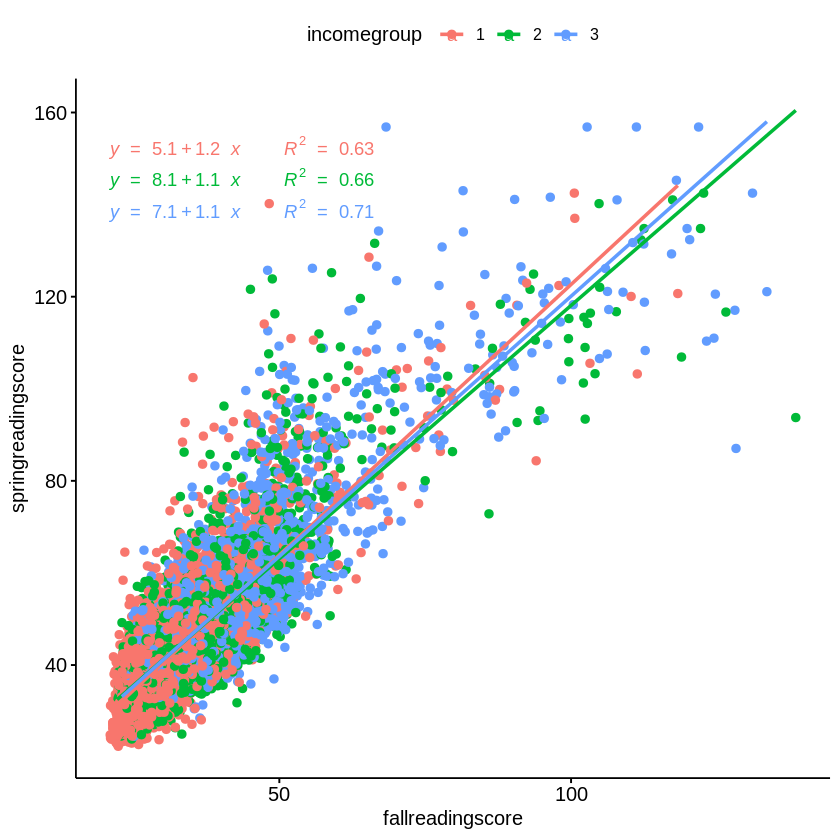

In [ ]:
ggscatter(
  data, x = "fallreadingscore", y = "springreadingscore",
  color = "incomegroup", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = incomegroup)
    )

In [ ]:
# Assumptions check for ANCOVA
# 1. Homogeneity of variances (using Levene's test)
print(stats.levene(data['springreadingscore'], data['fallreadingscore'], data['incomegroup']))

# 2. Normality of residuals (using Shapiro-Wilk test)
residuals_reading = model_reading.resid
print(stats.shapiro(residuals_reading))

LeveneResult(statistic=3742.6501021959575, pvalue=0.0)
ShapiroResult(statistic=0.9119972586631775, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# ANCOVA for math scores
model_math = ols('springmathscore ~ C(incomegroup) + fallmathscore', data=data).fit()
print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:18:53   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

Warning message:
“The dot-dot notation (`..eq.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(eq.label)` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


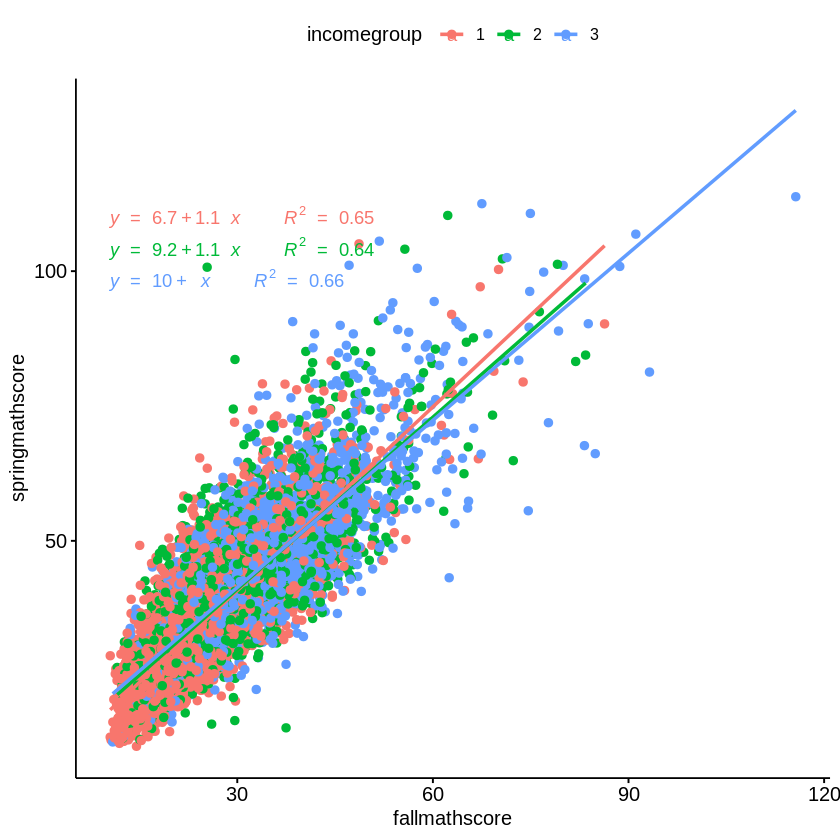

In [ ]:
# Interaction plot for math scores by using R
ggscatter(
  data, x = "fallmathscore", y = "springmathscore",
  color = "incomegroup", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = incomegroup)
    )

In [ ]:
# Assumptions check for ANCOVA
# 1. Homogeneity of variances (using Levene's test)
print(stats.levene(data['springmathscore'], data['fallmathscore'], data['incomegroup']))

# 2. Normality of residuals (using Shapiro-Wilk test)
residuals_math = model_math.resid
print(stats.shapiro(residuals_math))

LeveneResult(statistic=6617.433865388841, pvalue=0.0)
ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# ANCOVA for generalknowledge scores
model_generalknowledge = ols('springgeneralknowledgescore ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
print(model_generalknowledge.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                                 03:21:19   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

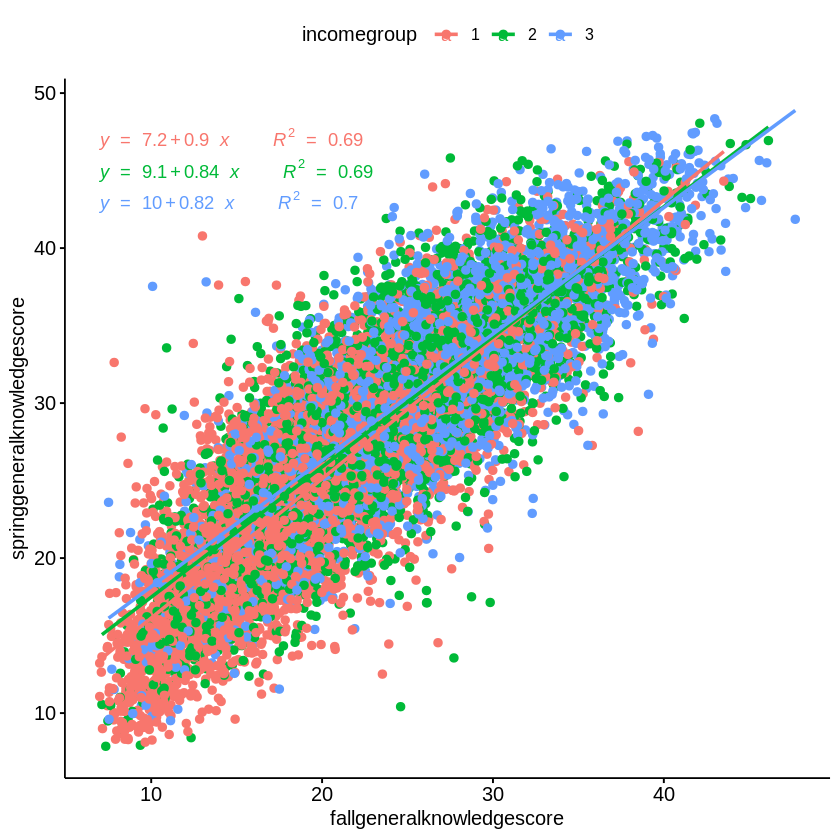

In [ ]:
# Interaction plot for generalknowledge scores by using R
ggscatter(
  data, x = "fallgeneralknowledgescore", y = "springgeneralknowledgescore",
  color = "incomegroup", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = incomegroup)
    )

In [ ]:
# Assumptions check for ANCOVA
# 1. Homogeneity of variances (using Levene's test)
print(stats.levene(data['springgeneralknowledgescore'], data['fallgeneralknowledgescore'], data['incomegroup']))

# 2. Normality of residuals (using Shapiro-Wilk test)
residuals_generalknowledge = model_generalknowledge.resid
print(stats.shapiro(residuals_generalknowledge))

LeveneResult(statistic=9588.578518644541, pvalue=0.0)
ShapiroResult(statistic=0.9980394840240479, pvalue=3.155014791089705e-11)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Step3: research question 2

Is there a significant difference in the academic growth (measured by changes in reading and math and general knowledge scores from fall to spring) among kindergarten students from different income groups, after adjusting for their initial academic abilities (fall scores)?

In [ ]:
# ANCOVA for change in reading scores
data['reading_change'] = data['springreadingscore'] - data['fallreadingscore']
model_reading_change = ols('reading_change ~ C(incomegroup) + fallreadingscore', data=data).fit()
print(model_reading_change.summary())


                            OLS Regression Results                            
Dep. Variable:         reading_change   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     133.5
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           4.50e-85
Time:                        03:26:29   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

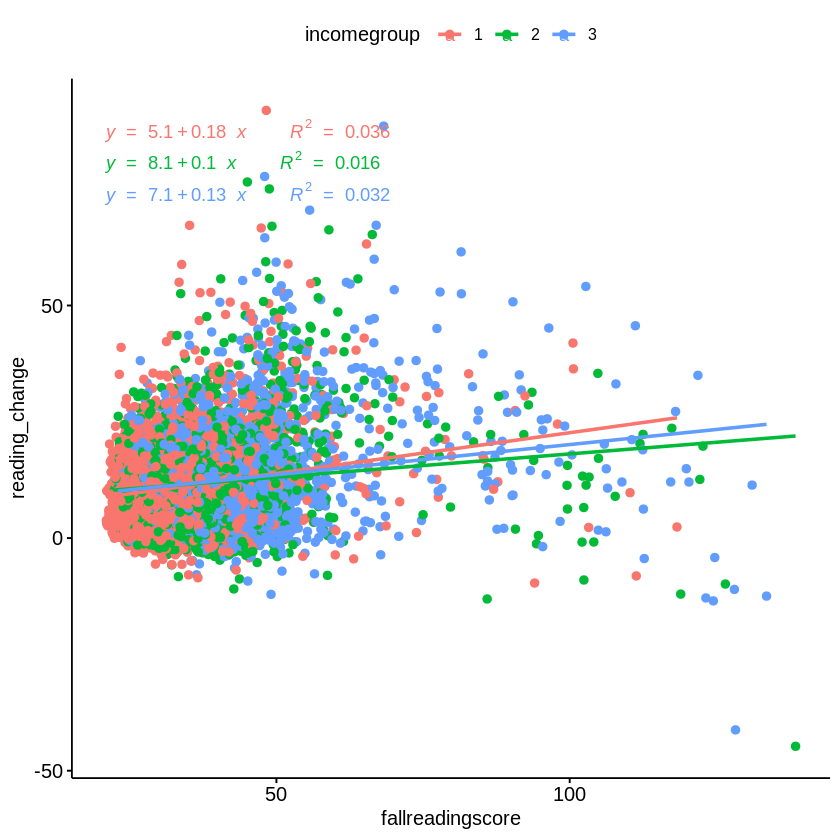

In [ ]:
# Interaction plot for change in reading scores by using R
ggscatter(
  data, x = "fallreadingscore", y = "reading_change",
  color = "incomegroup", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = incomegroup)
    )

In [ ]:
# Assumptions check for ANCOVA
# 1. Homogeneity of variances (using Levene's test)
print(stats.levene(data['reading_change'], data['fallreadingscore'], data['incomegroup']))

# 2. Normality of residuals (using Shapiro-Wilk test)
residuals_reading_change = model_reading_change.resid
print(stats.shapiro(residuals_reading_change))

LeveneResult(statistic=3750.2372943789087, pvalue=0.0)
ShapiroResult(statistic=0.9119972586631775, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# ANCOVA for change in math scores
data['math_change'] = data['springmathscore'] - data['fallmathscore']
model_math_change = ols('math_change ~ C(incomegroup) + fallmathscore', data=data).fit()
print(model_math_change.summary())


                            OLS Regression Results                            
Dep. Variable:            math_change   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     66.62
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           1.02e-42
Time:                        03:27:47   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

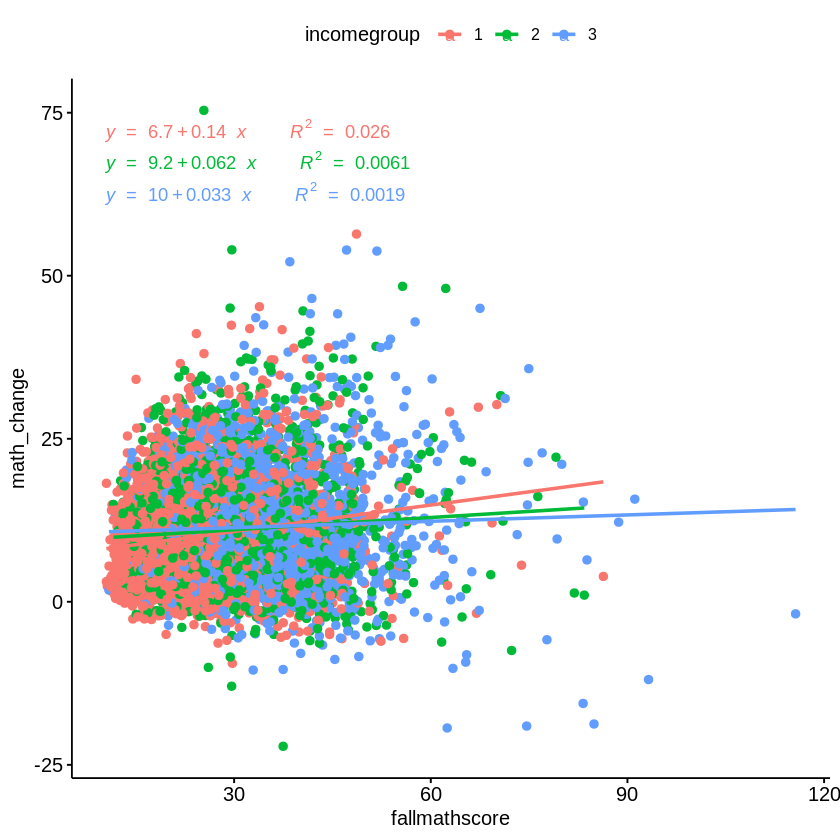

In [ ]:
# Interaction plot for change in math scores by using R
ggscatter(
  data, x = "fallmathscore", y = "math_change",
  color = "incomegroup", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = incomegroup)
    )

In [ ]:
# Assumptions check for ANCOVA
# 1. Homogeneity of variances (using Levene's test)
print(stats.levene(data["math_change"], data['fallmathscore'], data['incomegroup']))

# 2. Normality of residuals (using Shapiro-Wilk test)
residuals_math_change = model_math_change.resid
print(stats.shapiro(residuals_math_change))

LeveneResult(statistic=5809.188320752152, pvalue=0.0)
ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# ANCOVA for change in generalknowledge scores
data['generalknowledge_change'] = data['springgeneralknowledgescore'] - data['fallgeneralknowledgescore']
model_generalknowledge_change = ols('generalknowledge_change ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
print(model_generalknowledge_change.summary())


                               OLS Regression Results                              
Dep. Variable:     generalknowledge_change   R-squared:                       0.061
Model:                                 OLS   Adj. R-squared:                  0.061
Method:                      Least Squares   F-statistic:                     260.2
Date:                     Sat, 16 Mar 2024   Prob (F-statistic):          1.43e-163
Time:                             03:30:42   Log-Likelihood:                -33259.
No. Observations:                    11933   AIC:                         6.653e+04
Df Residuals:                        11929   BIC:                         6.656e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

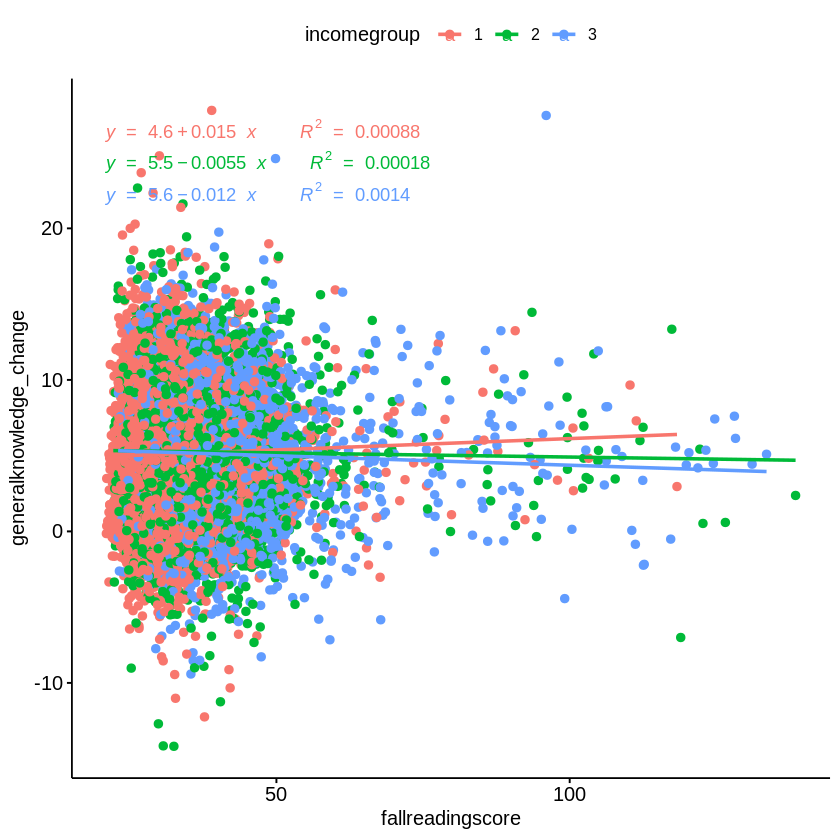

In [ ]:
# Interaction plot for change in generalknowledge scores by using R
ggscatter(
  data, x = "fallreadingscore", y = "generalknowledge_change",
  color = "incomegroup", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = incomegroup)
    )

In [ ]:
# Assumptions check for ANCOVA
# 1. Homogeneity of variances (using Levene's test)
print(stats.levene(data['generalknowledge_change'], data['fallgeneralknowledgescore'], data['incomegroup']))

# 2. Normality of residuals (using Shapiro-Wilk test)
residuals_generalknowledge = model_generalknowledge.resid
print(stats.shapiro(residuals_generalknowledge))

LeveneResult(statistic=10806.871891590079, pvalue=0.0)
ShapiroResult(statistic=0.9980394840240479, pvalue=3.155014791089705e-11)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
